In [1]:
import pandas as pd
df = pd.read_csv('WildBlueberryPollinationSimulationData.csv').dropna()
print(df.head())

   Row#  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0     0       37.5      0.75     0.25     0.25   0.25              86.0   
1     1       37.5      0.75     0.25     0.25   0.25              86.0   
2     2       37.5      0.75     0.25     0.25   0.25              94.6   
3     3       37.5      0.75     0.25     0.25   0.25              94.6   
4     4       37.5      0.75     0.25     0.25   0.25              86.0   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              52.0                  71.9              62.0              30.0   
1              52.0                  71.9              62.0              30.0   
2              57.2                  79.0              68.2              33.0   
3              57.2                  79.0              68.2              33.0   
4              52.0                  71.9              62.0              30.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  frui

In [2]:
from sklearn.model_selection import train_test_split
X = df[['clonesize', 'honeybee', 'bumbles', 'andrena', 'MaxOfUpperTRange', 'osmia', 'RainingDays', 'fruitset', 'fruitmass', 'seeds']]
# each independent variable has been tested if it increased or decreased R-Squared
# the independent variables giving the best R-Squared were chosen
Y = df[['yield']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, random_state=42)
print("X-Training Set: ", x_train.shape)
print("Y-Training Set: ", y_train.shape)
print("X-Test Set: ", x_test.shape)
print("Y-Test Set: ", y_test.shape)

X-Training Set:  (621, 10)
Y-Training Set:  (621, 1)
X-Test Set:  (156, 10)
Y-Test Set:  (156, 1)


In [3]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_predict = mlr.predict(x_test)

In [4]:
from sklearn.metrics import mean_squared_error
print("Training Set R-Squared: ", mlr.score(x_train, y_train))
print("Test Set R-Squared: ", mlr.score(x_test, y_test))

Training Set R-Squared:  0.9911950700230713
Test Set R-Squared:  0.9921237556996668


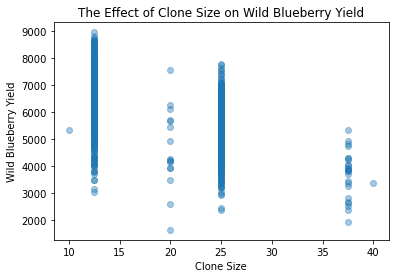

In [5]:
import matplotlib.pyplot as plt
plt.scatter(df[['clonesize']], df[['yield']], alpha=0.4)
plt.xlabel("Clone Size")
plt.ylabel("Wild Blueberry Yield")
plt.title("The Effect of Clone Size on Wild Blueberry Yield")
plt.show()

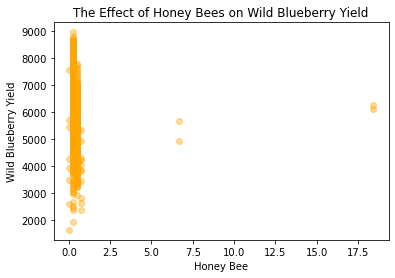

In [6]:
plt.scatter(df[['honeybee']], df[['yield']], alpha=0.4, color='orange')
plt.xlabel("Honey Bee")
plt.ylabel("Wild Blueberry Yield")
plt.title("The Effect of Honey Bees on Wild Blueberry Yield")
plt.show()

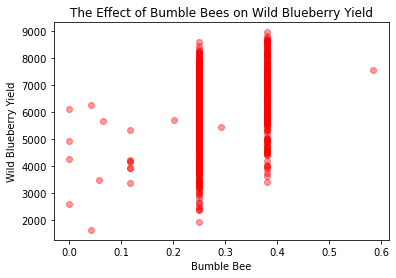

In [7]:
plt.scatter(df[['bumbles']], df[['yield']], alpha=0.4, color='red')
plt.xlabel("Bumble Bee")
plt.ylabel("Wild Blueberry Yield")
plt.title("The Effect of Bumble Bees on Wild Blueberry Yield")
plt.show()

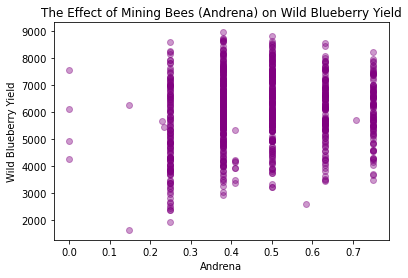

In [8]:
plt.scatter(df[['andrena']], df[['yield']], alpha=0.4, color='purple')
plt.xlabel("Andrena")
plt.ylabel("Wild Blueberry Yield")
plt.title("The Effect of Mining Bees (Andrena) on Wild Blueberry Yield")
plt.show()

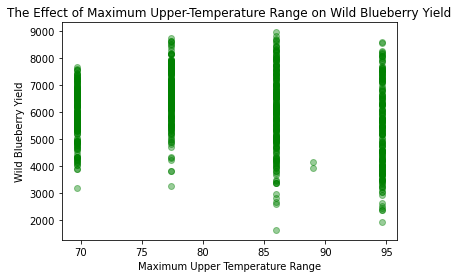

In [9]:
plt.scatter(df[['MaxOfUpperTRange']], df[['yield']], alpha=0.4, color='green')
plt.xlabel("Maximum Upper Temperature Range")
plt.ylabel("Wild Blueberry Yield")
plt.title("The Effect of Maximum Upper-Temperature Range on Wild Blueberry Yield")
plt.show()

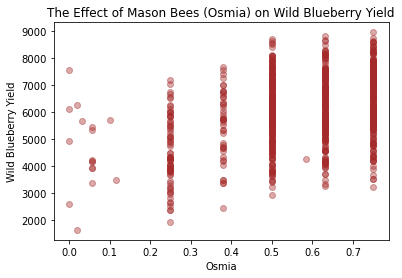

In [10]:
plt.scatter(df[['osmia']], df[['yield']], alpha=0.4, color='brown')
plt.xlabel("Osmia")
plt.ylabel("Wild Blueberry Yield")
plt.title("The Effect of Mason Bees (Osmia) on Wild Blueberry Yield")
plt.show()

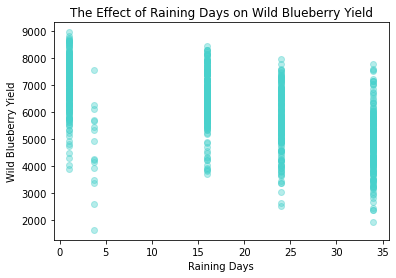

In [11]:
plt.scatter(df[['RainingDays']], df[['yield']], alpha=0.4, color='mediumturquoise')
plt.xlabel("Raining Days")
plt.ylabel("Wild Blueberry Yield")
plt.title("The Effect of Raining Days on Wild Blueberry Yield")
plt.show()

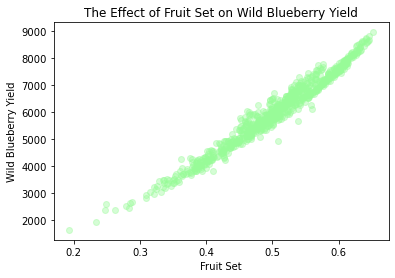

In [12]:
plt.scatter(df[['fruitset']], df[['yield']], alpha=0.4, color='palegreen')
plt.xlabel("Fruit Set")
plt.ylabel("Wild Blueberry Yield")
plt.title("The Effect of Fruit Set on Wild Blueberry Yield")
plt.show()

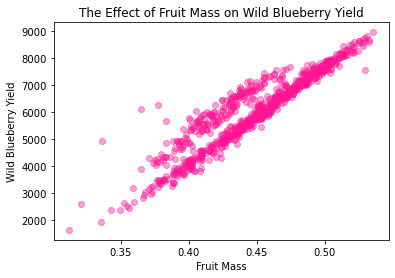

In [13]:
plt.scatter(df[['fruitmass']], df[['yield']], alpha=0.4, color='deeppink')
plt.xlabel("Fruit Mass")
plt.ylabel("Wild Blueberry Yield")
plt.title("The Effect of Fruit Mass on Wild Blueberry Yield")
plt.show()

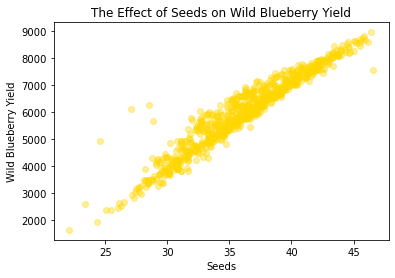

In [14]:
plt.scatter(df[['seeds']], df[['yield']], alpha=0.4, color='gold')
plt.xlabel("Seeds")
plt.ylabel("Wild Blueberry Yield")
plt.title("The Effect of Seeds on Wild Blueberry Yield")
plt.show()

In [15]:
### The clone size, honey bees, bumble bees, andrena, maximum upper-temperature range,
### osmia, and raining days do not have a linear relationship to Wild Blueberry yield
### according to the scatterplots, even though they do contribute to a stronger 
### R-Squared. Since I'm employing a multiple linear regression model, I'll stick to 
### independent variables that clearly show a linear relationship to yield.

In [16]:
X = df[['fruitset', 'fruitmass', 'seeds']]
# fruitset, fruitmass, and seeds have a strong linear relationship to yield!
Y = df[['yield']]
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, random_state=42)
print("X-Training Set: ", x_train.shape)
print("Y-Training Set: ", y_train.shape)
print("X-Test Set: ", x_test.shape)
print("Y-Test Set: ", y_test.shape)

X-Training Set:  (621, 3)
Y-Training Set:  (621, 1)
X-Test Set:  (156, 3)
Y-Test Set:  (156, 1)


In [17]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_predict = mlr.predict(x_test)

In [18]:
from sklearn.metrics import mean_squared_error
print("Training Set R-Squared: ", mlr.score(x_train, y_train))
print("Test Set R-Squared: ", mlr.score(x_test, y_test))

Training Set R-Squared:  0.9824328360996658
Test Set R-Squared:  0.9820010722542755


In [19]:
### While this gives a lower R-Squared value, it's still a strong value and it's best
### to stick with variables that truly show a linear relationship when building a 
### linear regression model. 

In [20]:
print("Slopes: ", mlr.coef_)
print("Intercept: ", mlr.intercept_)

Slopes:  [[ 11788.02571824 -31210.54764543    376.04195615]]
Intercept:  [427.88803625]


In [21]:
### MLR Equation:
### 427.88803625 = 11788.02571824X1 - 31210.54764543X2 + 376.04195615X3